# Testing

In [1]:
from utils import DataGenerator, Plot_Val_Test

import numpy as np
import pandas as pd



In [64]:
CSV = pd.read_csv('../Data/train_extra.csv')
# Balancing the Classes


# spling into train and validate
Idx_Split = np.random.uniform(size = CSV.shape[0])
CSV_Val = CSV[Idx_Split <= 0.2].copy()
CSV_Train = CSV[Idx_Split > 0.2].copy()

#rebalcing CSV_train
if True:
    CSV_Train['index'] = CSV_Train.index
    Re_Index = CSV_Train.groupby('grapheme_root').index.apply(lambda x: x.sample(n=1000, replace=True))
    CSV_Train = CSV_Train.loc[Re_Index.index.droplevel(),:]
    CSV_Train.reset_index(inplace = True)
    CSV_Train.drop(columns = ['index','level_0'], inplace = True)
    

print("Shape of Train is: {} x {} \nShape of Val is {} x {}".format(CSV_Train.shape[0], 
                                                                    CSV_Train.shape[1],
                                                                    CSV_Val.shape[0], 
                                                                    CSV_Val.shape[1]))

Shape of Train is: 168000 x 6 
Shape of Val is 40435 x 6


In [60]:
Re_Index.head()

grapheme_root        
0              67957      67957
               158408    158408
               79372      79372
               138199    138199
               171436    171436
Name: index, dtype: int64

In [61]:
Re_Index.index.droplevel()

Int64Index([ 67957, 158408,  79372, 138199, 171436,  39361,  61933,  52215,
            153360, 173941,
            ...
            167041,   1382,  43077, 102570, 189482,  64830,   1703, 115508,
             68006, 107842],
           dtype='int64', length=336000)

In [63]:
CSV_Train.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme,Image_Dir
0,Train_67957,0,0,0,ং,../Data/Train/Train_67957.jpg
1,Train_158408,0,0,0,ং,../Data/Train/Train_158408.jpg
2,Train_79372,0,0,0,ং,../Data/Train/Train_79372.jpg
3,Train_138199,0,0,0,ং,../Data/Train/Train_138199.jpg
4,Train_171436,0,0,0,ং,../Data/Train/Train_171436.jpg


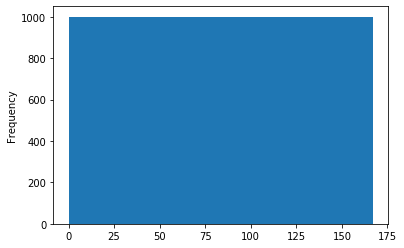

In [68]:
CSV_Train.grapheme_root.plot.hist(bins = 168)

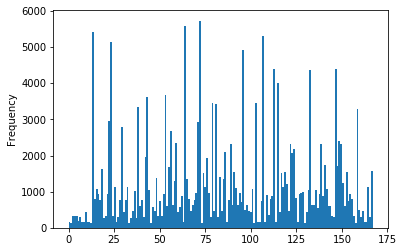

In [69]:
CSV.grapheme_root.plot.hist(bins = 168)

In [102]:
CSV.groupby(['grapheme_root']).grapheme_root.count().quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.1     158.7
0.2     309.2
0.3     448.4
0.4     611.4
0.5     760.5
0.6     944.0
0.7    1137.8
0.8    1705.8
0.9    3057.0
1.0    5736.0
Name: grapheme_root, dtype: float64

In [103]:
Y = CSV.grapheme_root.values

In [111]:
pd.DataFrame({'Y':Y}).groupby('Y').index.apply(lambda x: x.sample(n=1000, replace=True))

AttributeError: Cannot access attribute 'index' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [121]:
(pd.DataFrame({'Y':Y})
    .reset_index()
    .groupby('Y')
    .index
    .apply(lambda x: x.sample(n=1000, replace=True))
    .droplevel(0)
    .values     
    )

(168000,)